## Data Engineering

## Universe screening using Screener and RD Search

Data engineering is one of the most important phases in an artificial intelligence pipeline, without the appropriate data in place no AI system can deliver business value. The first stage of data engineering is the ingestion phase, gathering the appropriate data from existing data sources. This phase together with the feature engineering phase often times dominates the AI pipeline delivery timeframes and can account for half if not more of the project's lifetime. Luckily, the LSEG Refinitiv Data and Analytics ecosystem, has already done most of the engineering work for you. Whether through providing a friendly user experience via Workspace or easy to use APIs, an immensely rich data universe with prety much any type of data that an AI project could need is available at your fingertips. 

Whats even more important, through complex background processes that remain transparent to our end-users, all the data is consistent, clean and ready to be used out of the box, the LSEG Refinitiv team has done all the heavy lifting for you, to ensure a high quality and already curated dataspace. Furthermore, a rich meta data ecosystem accompanies the data through smart tagging allowing for rapid deployment of complex data science concepts.

This blueprint will take you through the different methodologies LSEG Refinitiv D&A produts offer so you can get the data you need in place and quickly move on to the next steps of your AI pipeline towards delivery of your AI systems.



### Workspace universe screening for Artificial Intelligence pipelines
Once the business incentive is clear on what your company expects from your new AI system, the data team should start narrowing down the data schema it believes it will need to deliver upon its promise. One of the most useful tools to enable the team to get its bearings in such a rich data universe as the one the LSEG Refinitv product offers is the Workspace Screener. It is a powerful and yet extremely friendly to use product, allowing the team to start exploring public and private sector companies data.

The screener can be found within Workspace just by typing Screener in the extremely versatile Workspace search box.

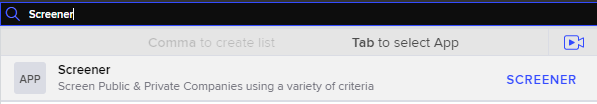



Once inside the Screener defining a filter and narrowing down the universe is as simple as using the intuitive interface and start introducing constraints.

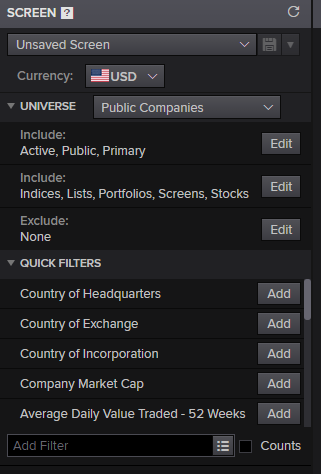

Here's an example of applying some filters to retrieve companies that have a market capitalisation of more than 5,000M$ within the energy industry, public stocks trading in NYSE with a quaterly return of more than 15%.

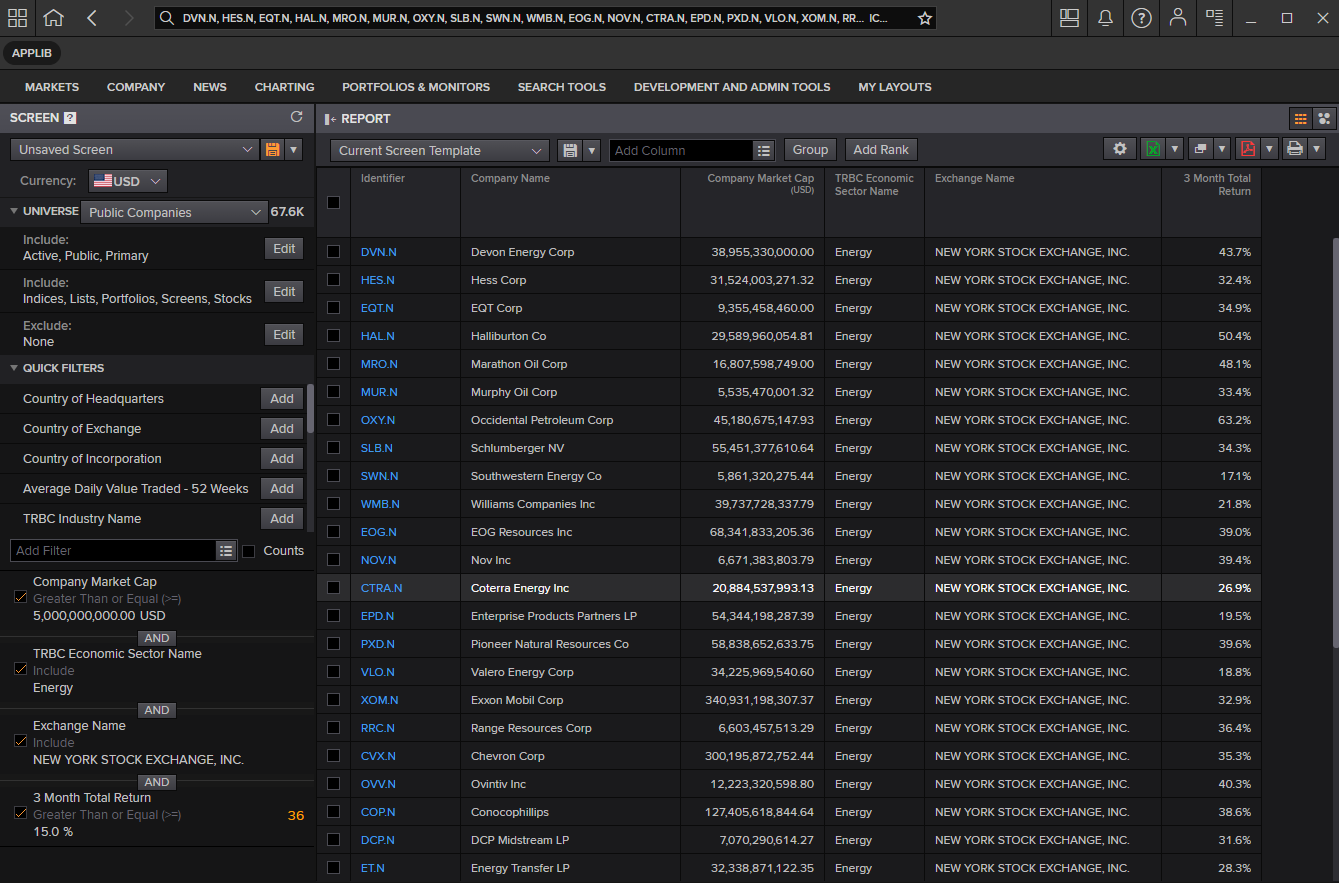


One of the very handy functions of screener is the ability to export the final query that was programmaticaly constructed  in the background in order to retrieve those results. If we click the dropdown button next to the excel icon and choose export as furmulas, a new excel sheet will open and the filtering formula will be saved on its first cell. From there we can directly copy paste to our python code and when the formula is excuted we will conveniently ingest the data in a pandas dataframe for further analysis.



The following code snipet is an example of the beforementioned process. We have copied the exported formula in the syntax variable and the columns to be ingested in the fields variable. Thereafter by calling the eikon API function get_data() we can retrieve the data in the dataframe.

In [ ]:
import refinitiv.dataplatform.eikon as ek
import pandas as pd

app_key = '<add your API key here>'
ek.set_app_key(app_key)

syntax = "SCREEN(U(IN(Equity(active,public,primary))/*UNV:Public*/), IN(TR.HQCountryCode,""GR""), IN(TR.TRBCEconSectorCode,""55""), CURN=EUR)"

fields = ["TR.CommonName","TR.CompanyMarketCap","TR.ExchangeName","TR.TRBCBusinessSector","TR.TotalReturn3Mo"]
df =  ek.get_data(syntax, fields)

print(df)

### Data ingestion through the Refinitiv Data libraries
As an alternative data ingestion approach and perhaps a more developer tailored one we can use the Refinitiv Data (RD) library which provides a powerful set of interfaces for uniform access to the Refinitiv data universe and is the successor of the RDP API.

The library provides multiple layers of abstraction allowing for different styles and programming techniques suitable for all developers.

The Access layer is the easiest way to get Refinitiv data. It provides simple interfaces allowing you to quickly prototype solutions in interactive environments such as Jupyter Notebooks. It was designed for quick experimentation with our data and for the specific needs of financial coders.

The Content layer is the foundation of the Access layer. It provides developers with interfaces suitable for more advanced use cases (synchronous function calls, async/await, event driven). The Content layer refers to logical market data objects such as market data prices and quotes, fundamental & reference data, historical data, company research data and so on.

The Delivery layer is a lower abstraction layer that allows your applications to retrieve data using the service agnostic delivery mechanisms defined by the Refinitiv Data Platform. The Delivery layer is a foundational component of the Content layer.

The Session layer defines interfaces allowing your application to connect to the Refinitiv Data Platform via its various access points (either via a direct connection, via Eikon, via the Refinitiv Workspace, via CodeBook or even via a local Real-Time Distribution System).

For a detailed overview of the RD library please refer to our in depth analysis in Discover our Refinitiv Data Platform Library.

As an example here is how we could  retrieve fundamentals and pricing history for GOOG.O. The RD library, once again conveniently for data science and AI projects, returns all ingestion results in pandas dataframes.

In [ ]:
import refinitiv.data as rd


rd.open_session()
df = rd.get_history(
    universe="GOOG.O",
    fields=["BID", "ASK", "TR.Revenue"],
    interval="1Y",
    start="2015-01-01",
    end="2019-10-01",
)

print(df)

If we executed a simple browser query on e.g. Santander bonds we would get an initial feature space of approximately 1475 different properties.  Using the powerful searching and browsing functionality of the RD library we can quickly start narrowing down this large dimensional  space. It is an iterative process allowing us to define the final feature collection we would like to be using during our AI pipeline, here's a query that decreasing the feature number:

In [ ]:
browser.execute(

    view = search.SearchViews.GOV_CORP_INSTRUMENTS,

    query = "Santander bonds",

    filter = "IsPerpetualSecurity ne true and IsActive eq true and \

                 not(AssetStatus in ('MAT' 'DC')) and RCSIssuerCountryLeaf xeq           'United States'",

)

Once we narrow down the feature space, we can  start exploring for more specific features and their names e.g. here's a query searching for available features that refer to coupon types:

In [ ]:
browser.properties('coupontype')

In [ ]:
df = rdp.get_history(universe="GOOG.O",
                    fields=["BID", "ASK", "TR.Revenue"],
                    interval="1Y",
                    start="2015-01-01",
                    end="2019-10-01")
print(df)

In [ ]:
from refinitiv.data.content import search

When the feature space we would like to ingest is well defined, we can start formulating the full search query that will ingest our final dataset. Please refer to article Building Search into your Application Workflow showcasing the full functionality and steps of the search process including:

views
navigators
features
queries
selects
boosts
order by and group by clauses
counts and limits

Find bellow the full definition of a search query and all available parameters that can be used to fine tune your search process.

In [ ]:
response=search.Definition(
    view = rdp.SearchViews.SearchAll,
    query = '<free-form query expression>',
    filter = '<structured filtered expression>',
    select = '<comma-separated list of properties',
    boost = '<structure expression ranking results>',
    order_by = '<Property> asc',
    group_by = '<Property>',                                        
    group_count = <numeric count>,
    top = <numeric count>,
    navigators = '<Property expression>',
    features = '<Flag directives>'
)

Here's an example of a search query ingesting the data under the feature space we have previously defined using the SearchBrowser object. Specifically this search query  retrieves the top 100 Santander Bonds within the parameter space. For those Bonds it retrieves columns [MaturityDate, IssueDate, CouponRate, FaceOutstanding, FaceIssuedTotal, RCSCouponTypeLeaf] ordering the results by MaturityDate.

In [ ]:
response = search.Definition(
    view = search.SearchViews.GOV_CORP_INSTRUMENTS,
    query = "Santander bonds",
    top = 100,
    filter = "IsPerpetualSecurity ne true and IsActive eq true and \
              not(AssetStatus in ('MAT' 'DC')) and RCSIssuerCountryLeaf xeq 'United States'",
    select = "MaturityDate, IssueDate, CouponRate, FaceOutstanding, FaceIssuedTotal, RCSCouponTypeLeaf",
    order_by = "MaturityDate"
).get_data()

response.data.df

### Conclusions
In this Blueprint we explored two very different methodologies we can use to retrieve our initial data for an Artificial Intelligence pipeline. The first approach, the Screener,  was a visual one that can however connect  to a programmatic process as it allows us to extract the exact query that needs to be executed against Refinitiv data. The seccond one is a purely programmatic approach using the new RD Libraries API that allows us to have an incredibly fine level of control during data ingestion.